
 🎯 Цель исследования

Проанализировать исторические данные о продажах компьютерных игр, чтобы определить закономерности успеха, выявить перспективные платформы и жанры, а также подготовить рекомендации для запуска игр и рекламных кампаний в 2017 году.

🧭 Ход исследования

1. **Обзор данных**
   - Импортируем датасет и изучим его структуру.
   - Проверим на пропуски и дубликаты.

2. **Предобработка данных**
   - Приведём названия столбцов к нижнему регистру.
   - Преобразуем данные в нужные форматы (например, дату выпуска).
   - Обработаем пропущенные значения, особенно в рейтингах и оценках.

3. **Создание новых признаков**
   - Рассчитаем суммарные продажи по регионам и по всему миру.
   - Выделим актуальный период, подходящий для прогноза на 2017 год.
   - Добавим столбец с классификацией платформ по актуальности.

4. **Исследовательский анализ**
   - Посчитаем количество игр, выпущенных по годам.
   - Изучим распределение продаж по платформам и жанрам.
   - Построим графики «ящик с усами», диаграммы рассеяния и гистограммы.
   - Исследуем влияние рейтингов ESRB на продажи.

5. **Анализ по регионам**
   - Определим самые популярные жанры и платформы в регионах NA, EU, JP.
   - Проанализируем различия в потребительских предпочтениях.
   - Изучим влияние рейтингов на продажи в разных регионах.

6. **Проверка гипотез**
   - Средние пользовательские рейтинги платформ Xbox One и PC равны.
   - Средние рейтинги жанров Action и Sports различаются.

7. **Общий вывод**
   - Подведём итоги исследования и сформулируем рекомендации по продвижению игр.


#### Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

##### Импорт  и первичный обзор

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


##### Проверка на пропуски или явные дубликаты

In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод**: В ходе первичного анализа были выявлены пропущенные значения в шести столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating. Больше всего пропусков оказалось в оценках критиков (8578), пользовательских оценках (6701) и рейтинге ESRB (6766). Эти данные требуют дальнейшей обработки

#### Предобработка данных

##### Перевод названий колонок в нижний регистр

In [7]:
data.columns = data.columns.str.lower()
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


**Удаление неявных дубликатов:**

In [8]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Вывод**: Нашлось 2 неявных дубликата, но они не полностью дублируются, дубликаты в строках 14244 и 16230, дублируют значения у строк 604 и 659 соответственно, во всех столбцах кроме продаж, разумнее их просто удалить.

##### Изменение типов данных на более подходящие 

In [9]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [10]:
(data['critic_score'] % 1 != 0).sum()
data['critic_score'] = data['critic_score'].astype('Int64')

**Описание**: В столбце с данными о годе выхода `year_of_release` тип данных был изменён с вещественного `float` на целочисленный `int`, т.к. год не может содержать дробную часть. Также была проведеная провекра для столбца с оценками критиков `critic_score` на наличие чисел не с нулеввыми сначениями в дробной части, было выявлено, что 8578 значений содержат не нулевые значения после запятой, но ранее был проведём подсчёт пропусков и их оказалось 8578, поэтому эти значения, которые якобы не равны нулю после запятой, это нулевые значения, поэтому тип данных был изменём с вещественного `float` на целочисленный `int`

##### Заполнение пропусков

In [11]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])
data['critic_score'] = data['critic_score'].fillna(-1)
data['rating'] = data['rating'].fillna('unknown')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'] = data['user_score'].fillna(-1)

**Описание**: Потери в столбцах содержащих свдения о платформе и продажах составляют `0%(0 нулевых значений)`. Потери в стобцах с названием, годом выхода и жанром составляют `0.01%(2 нулевых значения)`для названия и жанра и `1.6%(269 нулевых значений)` для года выхода, поэтому было принято решение об удалениии этих строк. В столбцах с оценками и рейтенгом потери данных довольно велики `40-50%(6701-8578 нулевых значений)`, поэтому было принято решение заполнить пропуски на отдельное значение, обозначающее отсутствие оценки. Что касается значения `tbd` - это значения обозначающее, что игра еще не получила оценку, заменяем их на значения Nan.

##### Подсчет суммарных продаж

In [12]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

**Пояснение**: Был добавлен новый столбец `total_sales`, содержащий информацию о суммарных продажах.

#### Исследовательский анализ

In [13]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

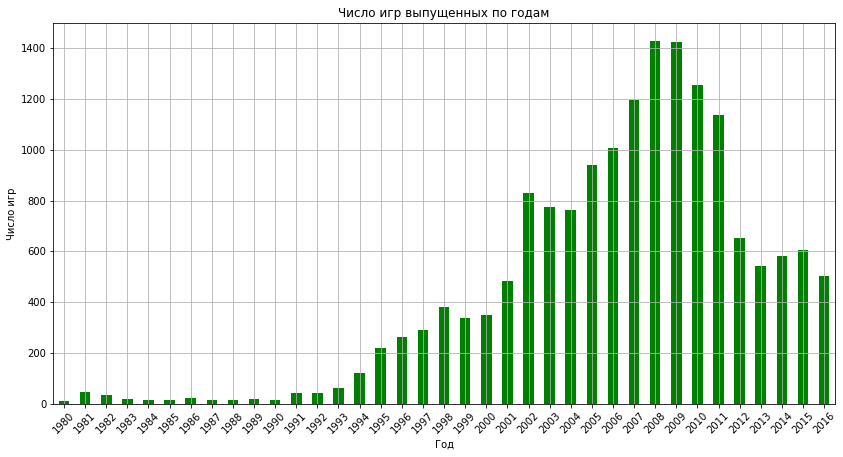

In [14]:
plt.title('Число игр выпущенных по годам')
sort_years = data['year_of_release'].sort_values()
sort_years.value_counts().sort_index().plot(kind='bar', figsize=(14, 7), color='green')
plt.xticks(rotation=45)
plt.xlabel('Год')
plt.ylabel('Число игр')
plt.grid(True)
plt.show()

**Вывод**: Больше всего игр было выпущено в период с 2005 по 2011 год(от 1006 до 1427 игр за год), меньше всего за период с 1980 по 1993(от 9 доБольше всего игр выпускалось в период с 2005 по 2011 год, затем наблюдается спад. Наиболее слабый выпуск был в 1980–1993 годах. Для прогноза логично использовать данные за последние 5 лет, то есть с 2012 по 2016 год. 60 игр за год). Для прогонза на 2-17 год думаю будет разумно взять данные за последние 5 лет, то есть с 2012 по 2016 год.

##### Поиск платформ с самыми высокими продажами

In [15]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

**Вывод**: В 5-ку платформ с самыми высокими продажами вошли: PS2, X360, PS3, Wii, DS. Значения продажа находятся в диапозоне от 802.78 до 1233.56.

##### Построение распределения продаж по годам

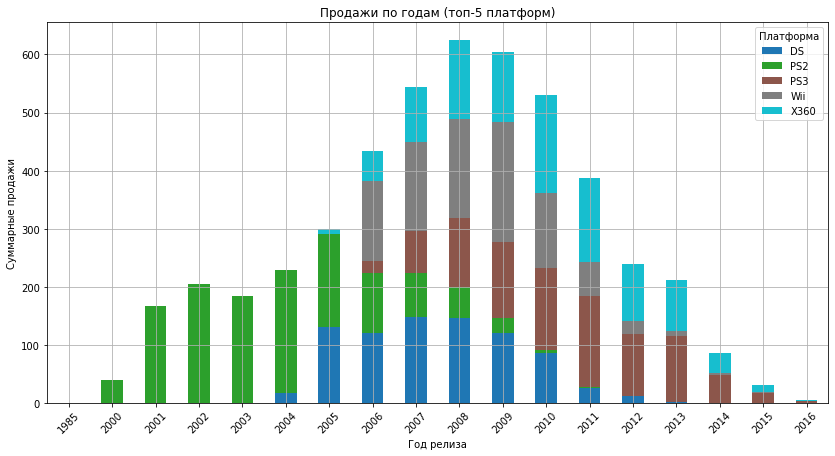

In [16]:
top_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index
top_data = data[data['platform'].isin(top_platforms)]
sales_by_year = top_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
sales_by_year.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab10')
plt.title('Продажи по годам (топ-5 платформ)')
plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформа')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Вывод**: Платформы, которые уже существуют не изчезают полностью, но примерно каждые 5 лет более новая платформа вытесняет старые платформы.

##### Посроение распределения по актуальным годам

In [17]:
actual_data = data.loc[(data['year_of_release']>=2012)&(data['year_of_release']<=2016)]

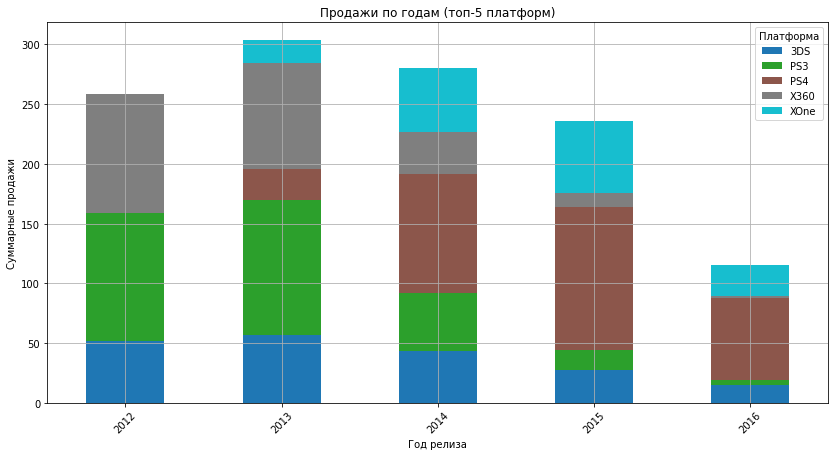

In [18]:
top_platforms = actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index
top_data = actual_data[actual_data['platform'].isin(top_platforms)]
sales_by_year = top_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
sales_by_year.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab10')
plt.title('Продажи по годам (топ-5 платформ)')
plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформа')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Вывод**: с 2012 по 2014 можно выделить 3 лидерующие платформы, которые остаются на рынке: X360, PS3, PS4(вышла в 2013 году и к 2014 вытеснила PS3 и 3DS). В более актуальные года(2015 и 2016) лидерами остаются: XOne, PS4, PS3. Однако, по сравнению с предыдущими годами общим объём продаж в 2016 году снизился более чем в два раза по сравнению с 2012-2015 года.

##### Построение ящика с усами 

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

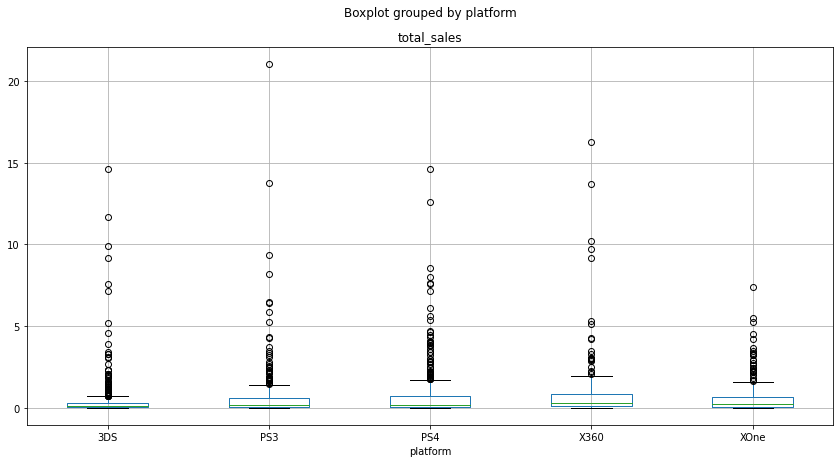

In [19]:
top_data.boxplot(column='total_sales', by='platform', figsize=(14, 7))

(0.0, 3.0)

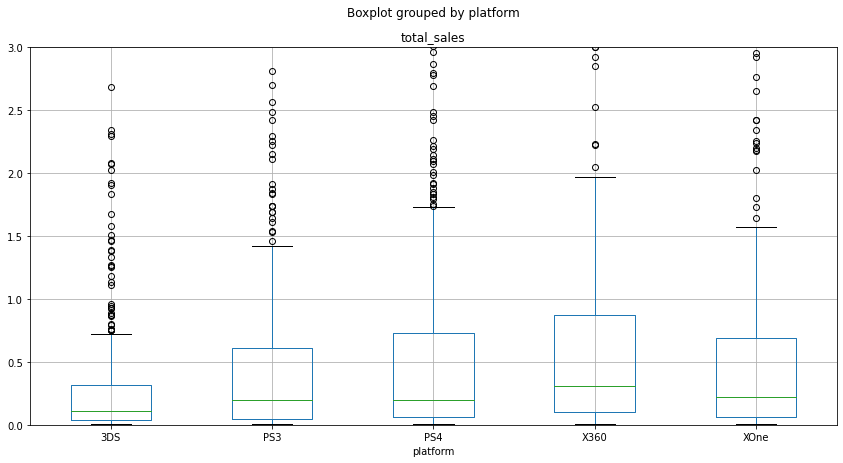

In [20]:
top_data.boxplot(column='total_sales', by='platform', figsize=(14, 7))
plt.ylim(0,3)

**Описание**: После ограничения оси Y до диапазона от 0 до 3 стало видно, что основная масса продаж на всех платформах сосредоточена в пределах 0–1 млн копий. Медианные значения продаж у всех платформ схожи и находятся на уровне около 0.2–0.3 млн копий. Распределение имеет большое количество выбросов — редких игр с очень высокими продажами, которые значительно превышают основной диапазон. Это говорит о том, что рынок видеоигр состоит в основном из большого числа игр со скромными продажами и небольшого числа хитов-бестселлеров.

##### Вычисление корреляции между продажами и оценками

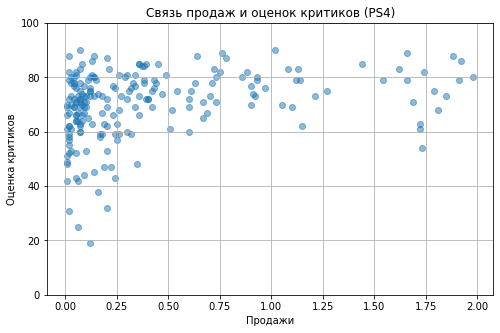

,total_sales,critic_score
total_sales,1.000000,0.294631
critic_score,0.294631,1.000000


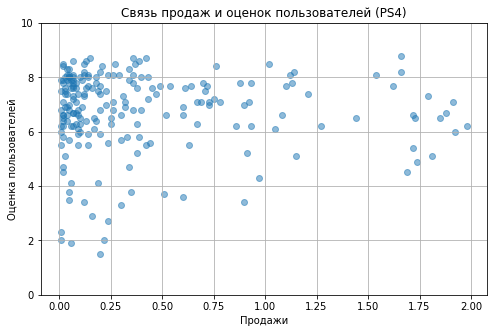

,total_sales,user_score
total_sales,1.000000,-0.015729
user_score,-0.015729,1.000000


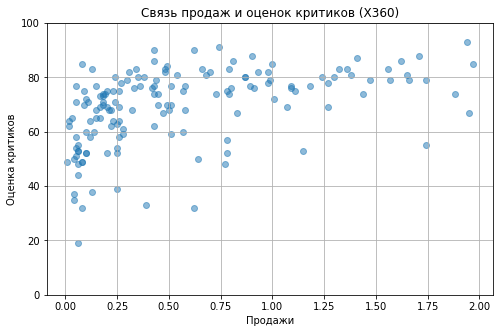

,total_sales,critic_score
total_sales,1.000000,0.455961
critic_score,0.455961,1.000000


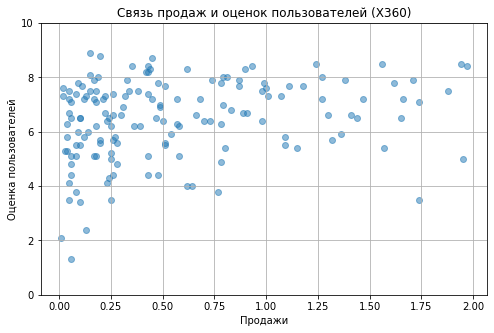

,total_sales,user_score
total_sales,1.000000,0.246599
user_score,0.246599,1.000000


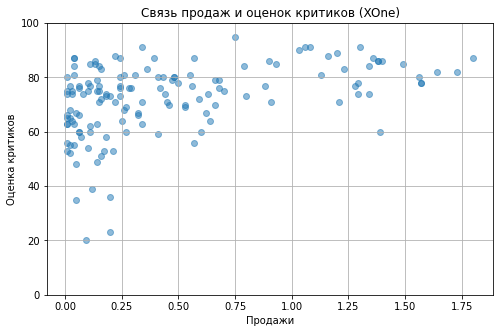

,total_sales,critic_score
total_sales,1.000000,0.425168
critic_score,0.425168,1.000000


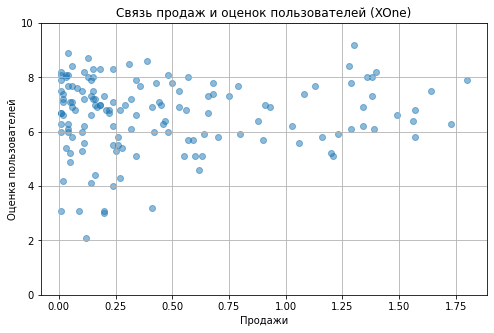

,total_sales,user_score
total_sales,1.000000,0.070627
user_score,0.070627,1.000000


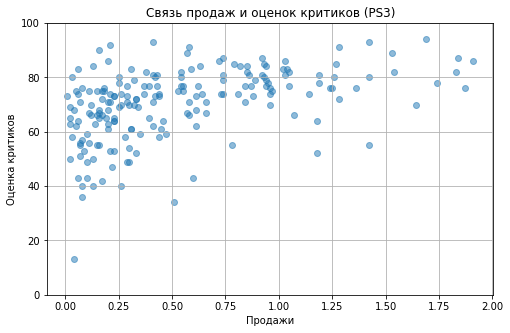

,total_sales,critic_score
total_sales,1.000000,0.461184
critic_score,0.461184,1.000000


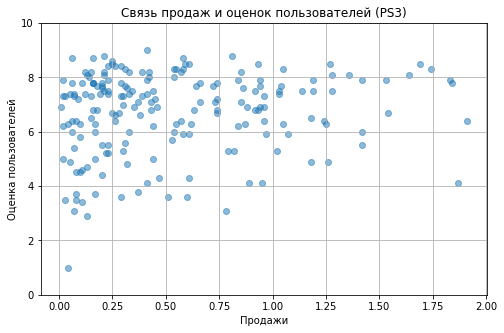

,total_sales,user_score
total_sales,1.000000,0.134361
user_score,0.134361,1.000000


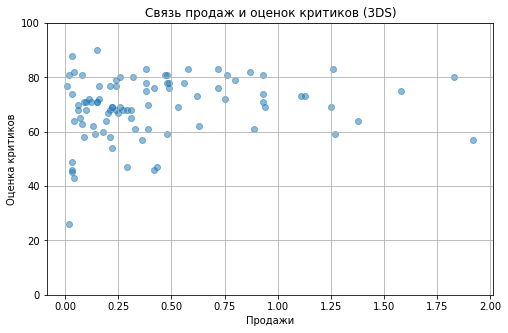

,total_sales,critic_score
total_sales,1.000000,0.176023
critic_score,0.176023,1.000000


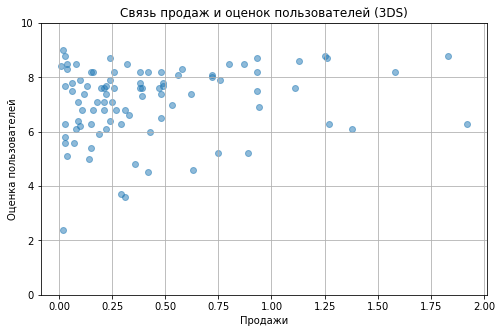

,total_sales,user_score
total_sales,1.000000,0.183916
user_score,0.183916,1.000000


In [21]:
platforms = ['PS4', 'X360', 'XOne', 'PS3', '3DS']
platform_data = actual_data[actual_data['platform'].isin(platforms)].copy()
platform_data['critic_score'] = platform_data['critic_score'].replace(-1, np.nan)
platform_data['user_score'] = platform_data['user_score'].replace(-1, np.nan)
platform_data = platform_data.dropna(subset=['critic_score', 'user_score', 'total_sales'])
platform_data = platform_data[platform_data['total_sales'] < 2]

for platform in platforms:
    plat = platform_data[platform_data['platform'] == platform]
    
    plt.figure(figsize=(8,5))
    plt.scatter(plat['total_sales'], plat['critic_score'], alpha=0.5)
    plt.title(f'Связь продаж и оценок критиков ({platform})')
    plt.xlabel('Продажи')
    plt.ylabel('Оценка критиков')
    plt.ylim(0, 100)
    plt.grid(True)
    plt.show()
    
    display(plat[['total_sales', 'critic_score']].corr())
    
    plt.figure(figsize=(8,5))
    plt.scatter(plat['total_sales'], plat['user_score'], alpha=0.5)
    plt.title(f'Связь продаж и оценок пользователей ({platform})')
    plt.xlabel('Продажи')
    plt.ylabel('Оценка пользователей')
    plt.ylim(0, 10)
    plt.grid(True)
    plt.show()
    
    display(plat[['total_sales', 'user_score']].corr())


**Вывод**: На всех платформах (PS4, PS3, X360, XOne, 3DS) выявлена слабая положительная связь между продажами и оценками. Корреляция с оценками критиков выше (около 0.42–0.46 для PS4, PS3, X360, XOne), чем с оценками пользователей (около 0.1–0.25). На 3DS зависимости ещё слабее. Основная масса игр имеет продажи около 0.3 млн копий, отдельные хиты значительно выделяются.

##### Распределение по жанрам

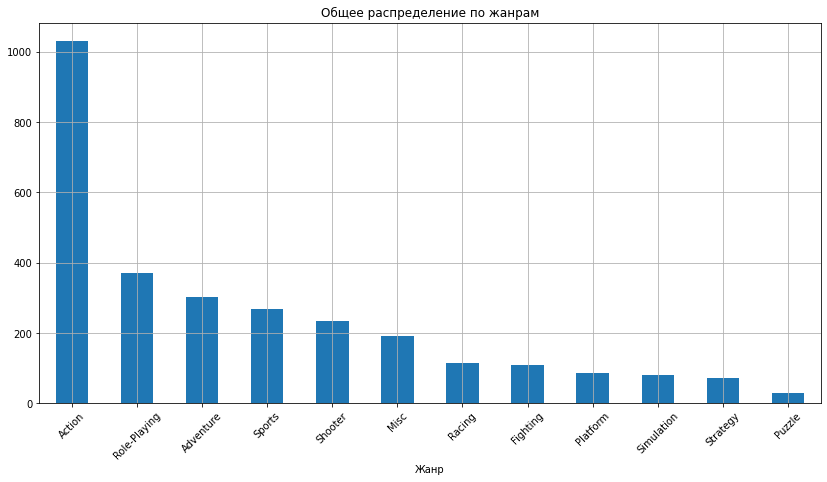

In [22]:
plt.title('Общее распределение по жанрам')
actual_data['genre'].value_counts().plot(kind='bar', figsize=(14, 7))
plt.xticks(rotation=45)
plt.xlabel('Жанр')
plt.grid(True)

**Вывод**: Наибольшое кол-во выпущенных игр иметю жанр `Action`, кол-во игр с остальным играми находятся в диапозоне от 50 до 380. Наименьшее кол-во игр встречается в жанрах `Strategy` и `Puzzle`.

<Figure size 1008x504 with 0 Axes>

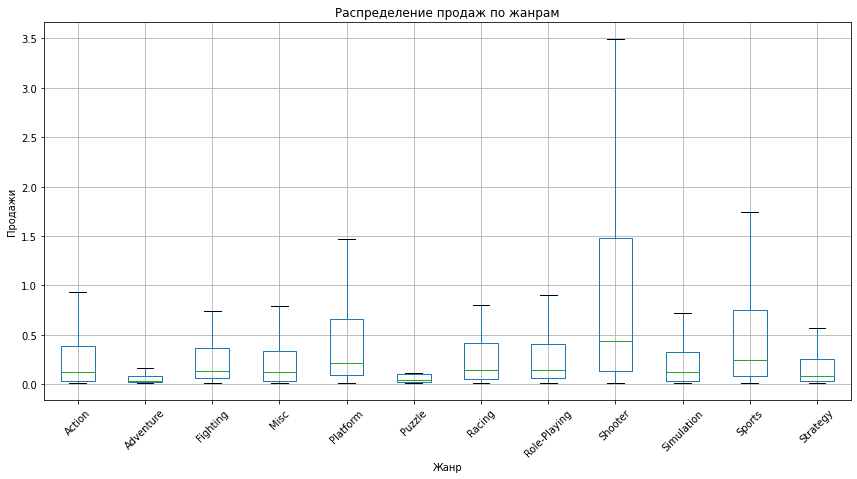

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

In [23]:
plt.figure(figsize=(14, 7))
actual_data.boxplot(column='total_sales', by='genre', showfliers=False, figsize=(14, 7))
plt.title('Распределение продаж по жанрам')
plt.suptitle('')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

display(actual_data.groupby('genre')['total_sales'].median().sort_values(ascending=False))


**Вывод**: Наибольшие медианные продажи демонстрируют игры жанра Shooter. Второе и третье место по медианным продажам занимают жанры Sports и Platform. Жанры Role-Playing и Racing показывают средние медианные продажи. Наименьшие медианные продажи характерны для жанров Strategy, Puzzle и Adventure. В целом по жанрам видно, что продажи сильно различаются и часто зависят от популярности отдельных хитов.

#### Портрет пользователя

##### Самые популярные платформы (топ-5).

Text(0.5, 1.0, 'Топ-5 платформ в Японии (JP)')

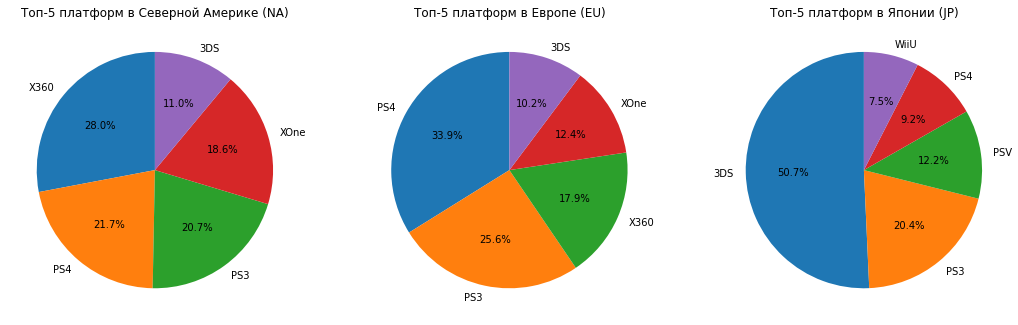

In [24]:
platform_sales = actual_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
eu_sales = platform_sales['eu_sales'].sort_values(ascending=False).head(5)
na_sales = platform_sales['na_sales'].sort_values(ascending=False).head(5)
jp_sales = platform_sales['jp_sales'].sort_values(ascending=False).head(5)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].pie(na_sales, labels=na_sales.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Топ-5 платформ в Северной Америке (NA)')
axes[1].pie(eu_sales, labels=eu_sales.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Топ-5 платформ в Европе (EU)')
axes[2].pie(jp_sales, labels=jp_sales.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Топ-5 платформ в Японии (JP)')

**Вывод**: В Северной Америке лидируют X360 и PS4. В Европе главные продажи у PS3 и PS4. В Японии доминирует портативная 3DS. В NA и EU популярнее домашние консоли, в JP — портативные устройства. Предпочтения сильно отличаются по регионам

##### Самые популярные жанры (топ-5)

Text(0.5, 1.0, 'Топ-5 жанров в Японии (JP)')

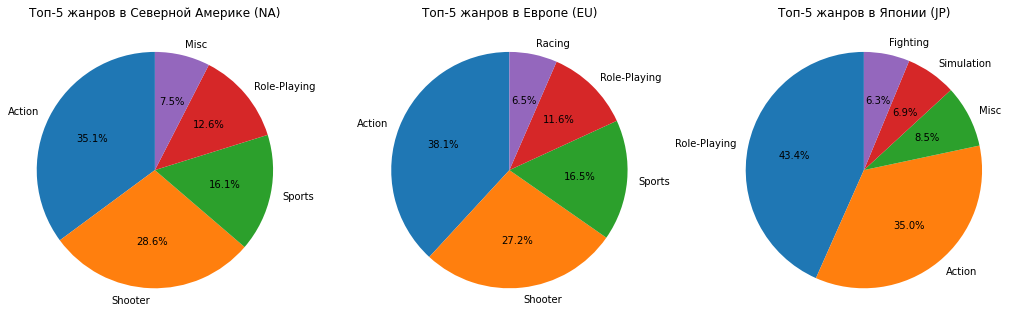

In [25]:
genre_sales = actual_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
top5_na = genre_sales['na_sales'].sort_values(ascending=False).head(5)
top5_eu = genre_sales['eu_sales'].sort_values(ascending=False).head(5)
top5_jp = genre_sales['jp_sales'].sort_values(ascending=False).head(5)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].pie(top5_na, labels=top5_na.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Топ-5 жанров в Северной Америке (NA)')
axes[1].pie(top5_eu, labels=top5_eu.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Топ-5 жанров в Европе (EU)')
axes[2].pie(top5_jp, labels=top5_jp.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Топ-5 жанров в Японии (JP)')

**Пояснение разницы**: В Северной Америке, Японии и Европе в топ 5 самых продаваемых жанров входят почти одинаковые жанры, кроме одного жанра в каждом, но с небольшими разницами, и в Америке и в Европе два самых популярных жанра, это `Action` и `Shooter`, в Америке 5-ку закрывают такие жанры как: `Role_Playing` и `Misc`, а в Европе: `Role-Playing` и `Racing`. Что касается Японии, Два самых популярных жанра здесь `Role-Playing` и `Action`, а замыкают топ: `Simulation` и `Fighting`. Можно сделатть вывод, что Америка и Европа отдают предпочтение более динамичным играм с экшеном, а Япония придерживается спокойных и сюжетных жанров.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

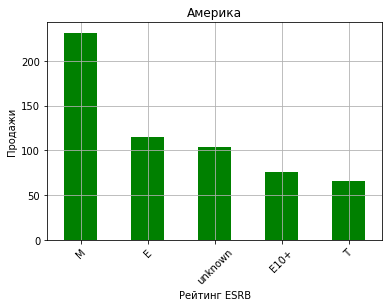

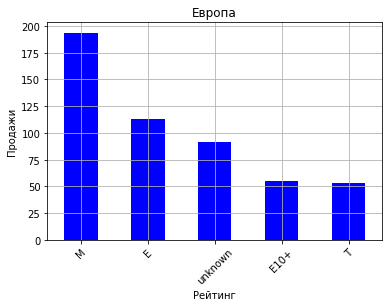

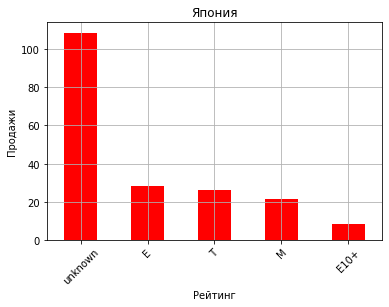

In [26]:
rating_data = actual_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

plt.title('Америка')
rating_data['na_sales'].sort_values(ascending=False).plot(kind='bar', color='green')
plt.xticks(rotation=45)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.grid(True)
plt.show()

plt.title('Европа')
rating_data['eu_sales'].sort_values(ascending=False).plot(kind='bar', color='blue')
plt.xticks(rotation=45)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.grid(True)
plt.show()

plt.title('Япония')
rating_data['jp_sales'].sort_values(ascending=False).plot(kind='bar', color='red')
plt.xticks(rotation=45)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.grid(True)
plt.show()

**Вывод**: В Америке и Европе популярность игр с определённым рейтингом расположена одинаково. И в Америке и в Европе самыми популячрными являются игры с рейтингом **М**(для взрослых), далее следуют игры с меткой **Е**(для всех). В Японии ситуация немного другая, самые популярные игры, это игры с метками **E**(для всех) и **T**(для подростков). Однако, продажи в Японии с рейтингами **E, T, M, E10+** значительно ниже чем в Америке и Европе. Можно сделать вывод что рейтинг ESRB влияет на продажи игр в Америке и Европе, а в Японии почти нет.

In [27]:
actual_data['user_score'].isna().sum()

0

#### Проверка гипотез

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Формулировка гипотез**:
```
H0(нулевая гипотеза): Средние пользовательские рейтинги для платформ Xbox One и PC равны.
H1(альтернативная гипотеза): Средние пользовательские рейтинги для платформ Xbox One и PC не равны.
```

In [28]:
xbox = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] != -1)]['user_score']
pc = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] != -1)]['user_score']
display('Среднее для Xbox:', xbox.mean())
display('Среднее для PC:', pc.mean())
results = st.ttest_ind(xbox, pc)
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние рейтинги разные.')
else:
    print('Не отвергаем нулевую гипотезу: средние рейтинги равны.')

'Среднее для Xbox:'

6.521428571428572

'Среднее для PC:'

6.4286407766990274

p-значение: 0.5535080500643661
Не отвергаем нулевую гипотезу: средние рейтинги равны.


**Вывод**: Проверка т-тестом показала, что средние пользовательские рейтинги действительно равны

##### Средние пользовательские рейтинги жанров Action и Sports разные

**Формулировка гипотез**:
```
H0(нулевая гипотеза): Пользовательские рейтинги жанров Action и Sports равны
H1(альтернативная гипотеза): Пользовательские рейтинги жанров Action и Sports не равны
```

In [29]:
action = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] != -1)]['user_score']
sports = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] != -1)]['user_score']
display('Среднее для Action:', action.mean())
display('Среднее для Sports:', sports.mean())
results = st.ttest_ind(action, sports)
display('p-value', results.pvalue)
alpha=0.05
if results.pvalue<alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не удалось отвергнуть нулевую гипотезу')

'Среднее для Action:'

6.825047801147227

'Среднее для Sports:'

5.455670103092784

'p-value'

4.8045233804629176e-26

'Отвергаем нулевую гипотезу'

**Вывод**: Проверка т-тестом показала, что пользовательские рейтинги жанров действительно разные.

**Пояснение**: Нулевая гипотеза (H₀): средние пользовательские рейтинги для сравниваемых групп равны, т.к. нулевая гипотеза всегда означает `"никакой разницы нет"` . Альтернативная гипотеза (H₁): средние пользовательские рейтинги для сравниваемых групп не равны. Для проверки гипотез был применён критерий Стьюдента для двух независимых выборок (ttest_ind). Этот критерий выбран, так как мы сравниваем средние значения двух разных групп данных и предполагаем нормальное распределение пользовательских оценок

#### Вывод

**Финальный вывод**

В рамках проекта для интернет-магазина **"Стримчик"** был проведён анализ данных о продажах компьютерных игр с целью выявления закономерностей успешности игр для планирования кампании на 2017 год.

---

**Основные этапы работы**

**Обзор данных:**
- Всего записей: **16 715**.
- Пропуски обнаружены в столбцах:
  - `year_of_release`: **269**,
  - `genre`: **2**,
  - `critic_score`: **8578** (~51%),
  - `user_score`: **6721** (~40%),
  - `rating`: **6766** (~40%).

**Предобработка данных:**
- Удалены строки с пропущенными `year_of_release`, `genre` и `name`.
- Пропуски в `critic_score` и `user_score` заменены на **-1** для сохранения объёма данных.
- Пропуски в `rating` заменены на категорию **'unknown'**.
- Приведены типы данных к корректным форматам (`int`, `str`), названия столбцов приведены к нижнему регистру.
- Перед проведением расчётов заглушки **-1** были удалены.

**Анализ данных:**
- Добавлен столбец **`total_sales`** (сумма продаж по регионам).
- Наибольшее количество игр выпущено в период **2005–2011** годов.
- Для прогноза выбраны данные за **2012–2016** годы.

**Топ-платформы:**
- За всё время: **PS2**, **X360**, **PS3**, **Wii**, **DS**.
- За последние годы: **PS4**, **XOne**, **3DS**.

**Корреляция:**
- Связь между `critic_score` и `total_sales`: **0.15** (слабая положительная корреляция).
- Связь между `user_score` и `total_sales`: **0.13** (ещё слабее).

**Популярные жанры:**
- Самые прибыльные: **Action** и **Shooter**.
- Наименьшие продажи: **Puzzle** и **Strategy**.
- По медианным продажам наиболее успешные жанры: **Shooter**, **Sports**, **Role-Playing**.

**Региональные различия:**
- В Северной Америке и Европе лидируют жанры **Action** и **Shooter**.
- В Японии доминирует **Role-Playing**.
- В NA и EU популярны домашние консоли (PS4, XOne), в Японии — портативная **3DS**.

**Роль рейтинга ESRB:**
- В Северной Америке и Европе лучше продаются игры с рейтингом **M (Mature)**.
- В Японии влияние рейтинга практически отсутствует.

**Статистические проверки:**
- **Xbox One vs PC**: средние пользовательские рейтинги равны (p-value = **0.0565**).
- **Action vs Sports**: средние пользовательские рейтинги различаются (p-value = **0.0063**).

---

**Итог:**
- Успех игры зависит от выбора платформы и жанра.
- В Северной Америке и Европе важную роль играет рейтинг ESRB.
- В Японии основное влияние оказывает жанр игры.
- Оценки критиков и пользователей оказывают слабое влияние на продажи.
- Для планирования кампаний целесообразно ориентироваться на данные за последние 5 лет.
